In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from pathlib import Path

from attila.data.parse import parse_data, get_data
from attila.util.config import get_config
from attila.util.plots import plot_sample
from attila.experiments.data import load_experiments
from attila.experiments.do import do_batch_experiments
from attila.experiments.tools import create_tex_experiments

In [3]:
_here = Path('.').resolve()
config = get_config(_here / 'config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [4]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

In [5]:
experiments_file = _here / 'experiments.json'
experiments = load_experiments(experiments_file)

testing data: X ~ (28, 120, 120, 1), y ~ (28, 120, 120, 3)
ready to perform #1 / 1 batch of experiments
ready to perform 8 experiments
=== experiment #1 / 8: with_same
= dataset training: X ~ (54, 120, 120, 1), y ~ (54, 120, 120, 3)
= dataset validation: X ~ (10, 120, 120, 1), y ~ (10, 120, 120, 3)
= dataset test: X ~ (28, 120, 120, 1), y ~ (28, 120, 120, 3)
=== model
= # layers: 25
= # total params: 1882115
= # trainable params: 1882115
= # non-trainable params: 0
Epoch 1/5
14/14 [==============================] - 1s 92ms/step - loss: 0.3638 - accuracy: 0.8905 - batch_metric-mean_IoU: 0.0141 - batch_metric-DSC: 0.0785 - val_loss: 0.1327 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 2.1855e-10 - val_batch_metric-DSC: 0.0022 - lr: 0.0010
Epoch 2/5
14/14 [==============================] - 0s 16ms/step - loss: 0.1154 - accuracy: 0.9578 - batch_metric-mean_IoU: 0.0253 - batch_metric-DSC: 0.0690 - val_loss: 0.1557 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 2.2847e-10 - val_ba

/home/h4/stfo194b/scratch/attila/attila/util/plots.py:123: UserWarning: No contour levels were found within the data range.
  plt.contour(ground_truth, colors='red', levels=[0.5])


=== experiment #2 / 8: without_same
= dataset training: X ~ (54, 120, 120, 1), y ~ (54, 120, 120, 3)
= dataset validation: X ~ (10, 120, 120, 1), y ~ (10, 120, 120, 3)
= dataset test: X ~ (28, 120, 120, 1), y ~ (28, 120, 120, 3)
=== model
= # layers: 21
= # total params: 1697795
= # trainable params: 1697795
= # non-trainable params: 0
Epoch 1/5
14/14 [==============================] - 1s 50ms/step - loss: 0.4551 - accuracy: 0.8197 - batch_metric-mean_IoU: 0.0117 - batch_metric-DSC: 0.0243 - val_loss: 0.1712 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 0.0082 - val_batch_metric-DSC: 0.0169 - lr: 0.0010
Epoch 2/5
14/14 [==============================] - 0s 16ms/step - loss: 0.1330 - accuracy: 0.9578 - batch_metric-mean_IoU: 0.0127 - batch_metric-DSC: 0.0442 - val_loss: 0.1035 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 0.0283 - val_batch_metric-DSC: 0.0532 - lr: 0.0010
Epoch 3/5
14/14 [==============================] - 0s 14ms/step - loss: 0.0803 - accuracy: 0.9578 - batc

14/14 [==============================] - 1s 59ms/step - loss: 0.4577 - accuracy: 0.8859 - batch_metric-mean_IoU: 0.0155 - batch_metric-DSC: 0.0624 - val_loss: 0.1972 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 0.0040 - val_batch_metric-DSC: 0.0089 - lr: 0.0010
Epoch 2/5
14/14 [==============================] - 0s 18ms/step - loss: 0.1512 - accuracy: 0.9578 - batch_metric-mean_IoU: 0.0293 - batch_metric-DSC: 0.0546 - val_loss: 0.1043 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 0.0657 - val_batch_metric-DSC: 0.1129 - lr: 0.0010
Epoch 3/5
14/14 [==============================] - 0s 19ms/step - loss: 0.0864 - accuracy: 0.9578 - batch_metric-mean_IoU: 0.1271 - batch_metric-DSC: 0.1722 - val_loss: 0.0771 - val_accuracy: 0.9598 - val_batch_metric-mean_IoU: 0.1651 - val_batch_metric-DSC: 0.2451 - lr: 0.0010
Epoch 4/5
14/14 [==============================] - 0s 19ms/step - loss: 0.0744 - accuracy: 0.9578 - batch_metric-mean_IoU: 0.1550 - batch_metric-DSC: 0.2256 - val_loss: 0.07

KeyError: 'batch_metric-mean_DSC'

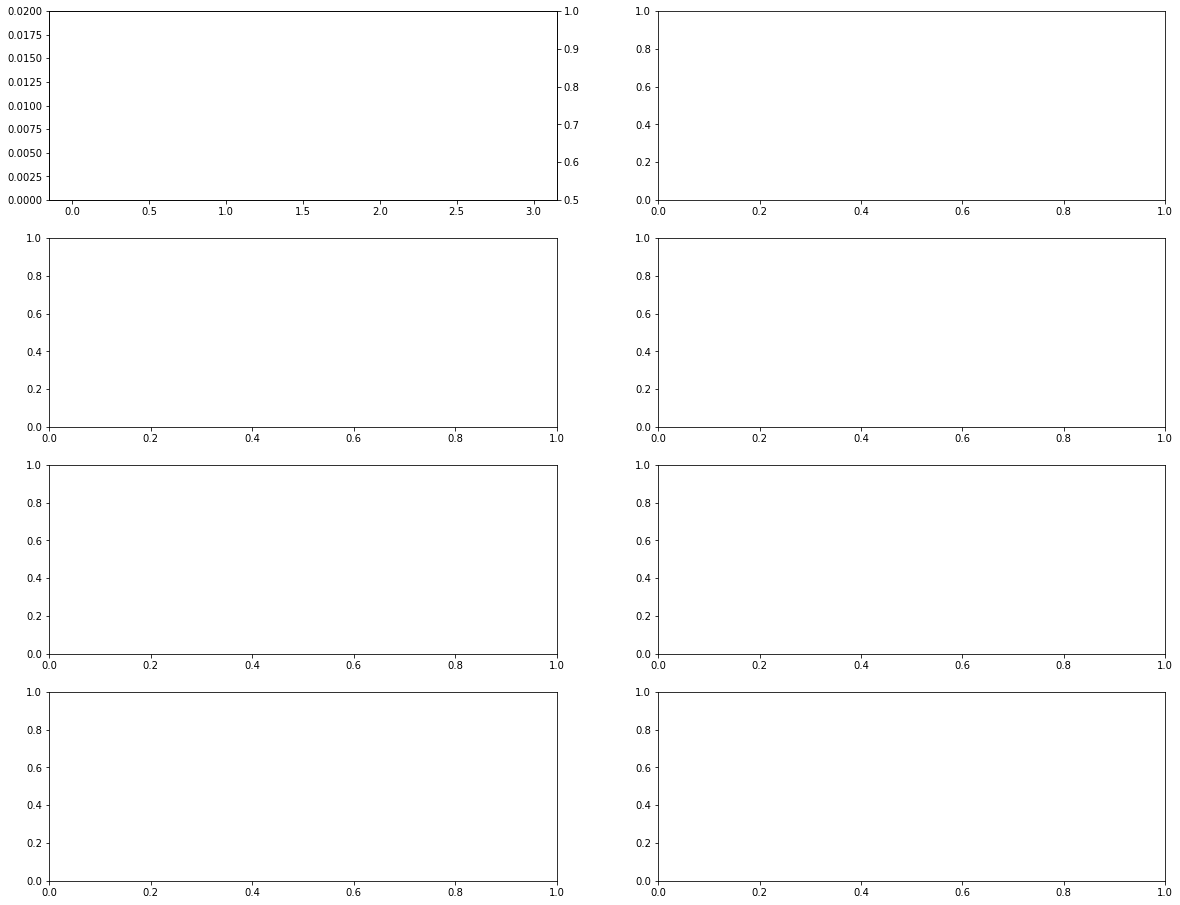

In [8]:
do_batch_experiments(experiments, (X, y), config, out_path)

In [ ]:
create_tex_experiments(config, out_path, out_path / 'tables.tex')